# 1.0 Full Exploratory Data Analysis

## Libraries

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%run '0.2-carloseci-explore-data.ipynb'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1777k  100 1777k    0     0  4853k      0 --:--:-- --:--:-- --:--:-- 4842k
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


/home/carlosedib/anaconda3/envs/testing_cookiecutter_sample/lib/python3.10/site-packages/pandas_flavor/register.py:164: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330327 entries, 0 to 330326
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  330327 non-null  object
 1   date            330327 non-null  object
 2   value           330327 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 7.6+ MB


### Explore data

In [3]:
sns.set_style("whitegrid")

In [4]:
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)

#### Appearance of new covid-19 cases in Latam

Subset data.

In [5]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

/home/carlosedib/anaconda3/envs/testing_cookiecutter_sample/lib/python3.10/site-packages/pandas_flavor/register.py:164: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.query` instead.
  return method(self._obj, *args, **kwargs)
/home/carlosedib/anaconda3/envs/testing_cookiecutter_sample/lib/python3.10/site-packages/pandas_flavor/register.py:164: DeprecationWarning: This function will be deprecated in a 1.x release. Kindly use `pd.DataFrame.query` instead.
  return method(self._obj, *args, **kwargs)


,country_region,date,value
7,Argentina,2020-01-22,0
31,Brazil,2020-01-22,0
58,Chile,2020-01-22,0


Plot time series.

In [6]:
import testing_cookiecutter_sample.visualization.visualize as visualize

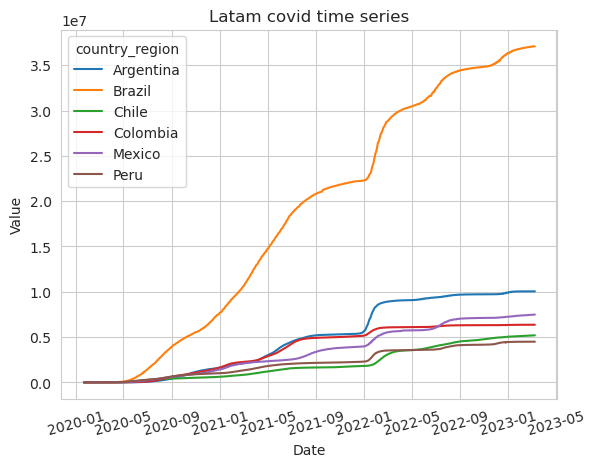

In [7]:
visualize.covid_time_series(some_latam_countries_df)

#### Latam in global context

Top `n` countries.

In [8]:
import testing_cookiecutter_sample.features.build_features as f

top_countries_df, top_countries_palette = f.top_countries(processed_covid_df, countries)
top_countries_df.head()

/home/carlosedib/anaconda3/envs/testing_cookiecutter_sample/lib/python3.10/site-packages/pandas_flavor/register.py:164: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)


,country_region,value,color
0,US,53813184406,lightblue
1,India,29131119694,lightblue
2,Brazil,21182690594,red
3,France,16105911886,lightblue
4,Germany,13686043720,lightblue


Plot to Latam in highlighted bars.

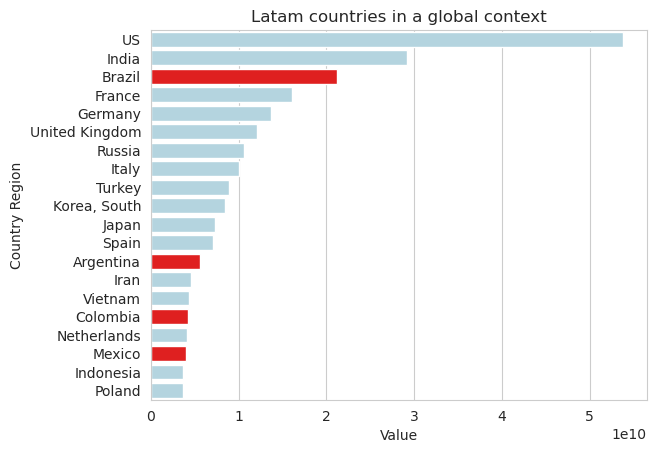

In [9]:
visualize.top_latam_countries(top_countries_df, top_countries_palette)